<a href="https://colab.research.google.com/github/eprayoga/Deteksi-Emosi-pada-Teks-Indonesia/blob/main/emotion_detection_twitter_KKN_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
dataset_url = "https://raw.githubusercontent.com/eprayoga/Deteksi-Emosi-pada-Teks-Indonesia/main/datasets/Twitter_Emotion_Dataset.csv"

df = pd.read_csv(dataset_url)

In [ ]:
df.columns

Index(['label', 'tweet'], dtype='object')

In [ ]:
df.shape

(4401, 2)

In [ ]:
#no nuls value
df.isnull().sum().sum()

0

In [ ]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [ ]:
temp = df.groupby('label').count()['tweet'].reset_index().sort_values(by='tweet', ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,tweet
0,anger,1101
2,happy,1017
4,sadness,997
1,fear,649
3,love,637


<Axes: xlabel='label', ylabel='count'>

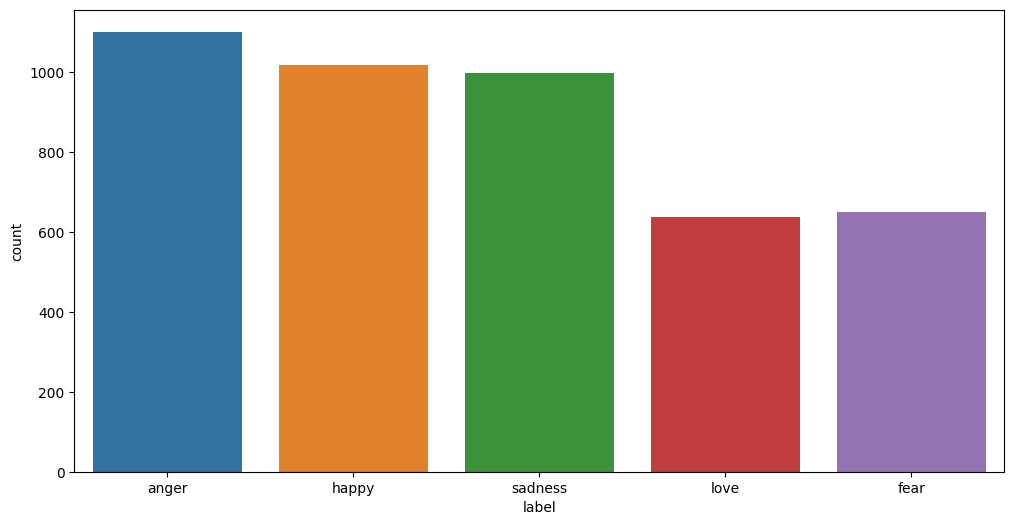

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df)

In [ ]:
fig=go.Figure(go.Funnelarea(
    text=temp.label,
    values=temp.tweet,
    title= {"position":"top center", "text": "Funnel-chart on Case Number Distribution"}))
fig.show()

In [ ]:
df['temp']= df['tweet'].apply(lambda x: str(x).split())
top= Counter([item for sublist in df['temp'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns=["Common_words", 'count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,[USERNAME],1754
1,yg,1607
2,yang,1572
3,dan,1527
4,di,1518
5,aku,894
6,itu,841
7,ada,840
8,ini,747
9,sama,692


In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count', title='Tree of Most Common words')
fig.show()

In [ ]:
fig = px.bar(temp,x="count", y="Common_words", 
             title="Common words in Selected Text", orientation='h', width=700, height=700,color='Common_words')
fig.show()

In [ ]:
most_popular_case = df[df['label']=="anger"]

In [ ]:
#MosT common  words in 
top = Counter([item for sublist in most_popular_case['temp'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,[USERNAME],832
1,yg,543
2,di,412
3,dan,326
4,yang,281
5,ga,253
6,itu,239
7,ada,233
8,mau,172
9,ini,171


In [ ]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words popular cases Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
# if n_words=1 -> unigrams, if n_words=2 -> bigrams..
def get_top_Nwords(corpus, n=None, remove_stop_words=False, n_words=1):
    if remove_stop_words:
        vec = CountVectorizer(stop_words='english', ngram_range=(n_words, n_words)).fit(corpus)
    else:
        vec = CountVectorizer(ngram_range=(n_words, n_words)).fit(corpus)
    
    bag_ofWords =vec.transform(corpus)
    sum_words = bag_ofWords.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
common_words = get_top_Nwords(df['tweet'].drop_duplicates(), 20, remove_stop_words=True, n_words=2)
for word, freq in common_words:
    print(word, freq)

username username 634
ada yang 91
ada yg 87
orang yang 86
jatuh cinta 78
hari ini 68
username url 65
orang lain 65
orang yg 58
terima kasih 58
apa yang 55
ga ada 53
ya allah 53
aku sayang 45
ga bisa 43
salah satu 42
sayang banget 41
orang orang 40
ada di 36
saat ini 36


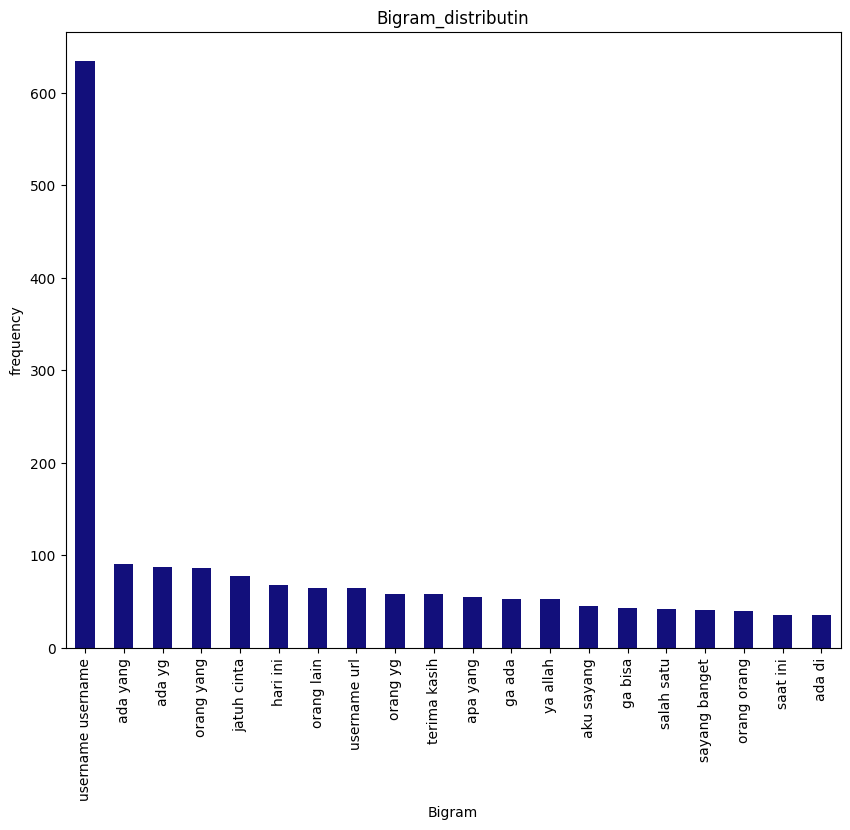

In [ ]:
train_temp =pd.DataFrame(common_words, columns=['text', 'count'])
fig = plt.figure(figsize=(10,8))
ax1 = train_temp.groupby('text').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                            color='#120f7b')
ax1.set_title("Bigram_distributin")
ax1.set_xlabel('Bigram')
ax1.set_ylabel("frequency")
plt.show()

In [ ]:
common_words = get_top_Nwords(df['tweet'].drop_duplicates(), 20, remove_stop_words=True, n_words=3)
for word, freq in common_words:
    print(word, freq)

username username username 329
username username url 27
sayang banget sama 21
aku cinta kamu 20
selamat ulang tahun 16
aku sayang kamu 15
kamu aku cinta 15
cinta kamu aku 15
kepada allaah swt 13
aku berlindung kepada 12
berlindung kepada allaah 12
tidak ada yang 11
pada saat itu 11
yang ada di 11
stiap rmh sakit 11
satu sama lain 10
allaah swt dari 10
swt dari godaan 10
dari godaan setan 10
godaan setan yang 10


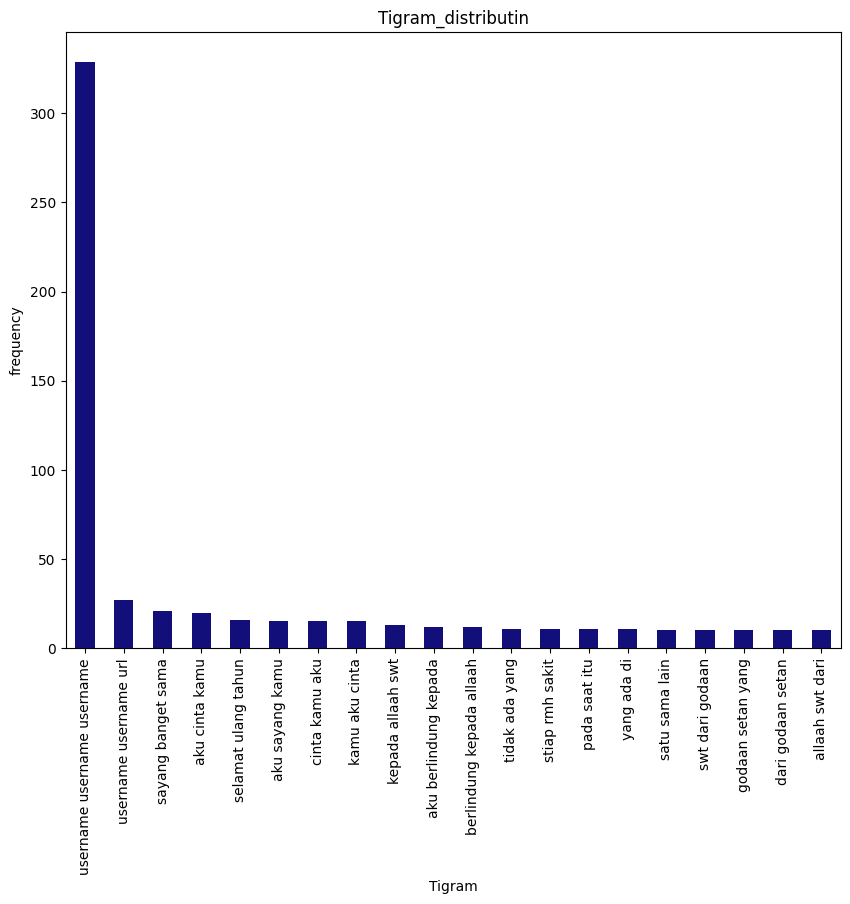

In [ ]:
train_temp =pd.DataFrame(common_words, columns=['text', 'count'])
fig = plt.figure(figsize=(10,8))
ax1 = train_temp.groupby('text').sum()['count'].sort_values(ascending=False).plot(kind='bar',
                                                                            color='#120f7b')
ax1.set_title("Tigram_distributin")
ax1.set_xlabel('Tigram')
ax1.set_ylabel("frequency")
plt.show()

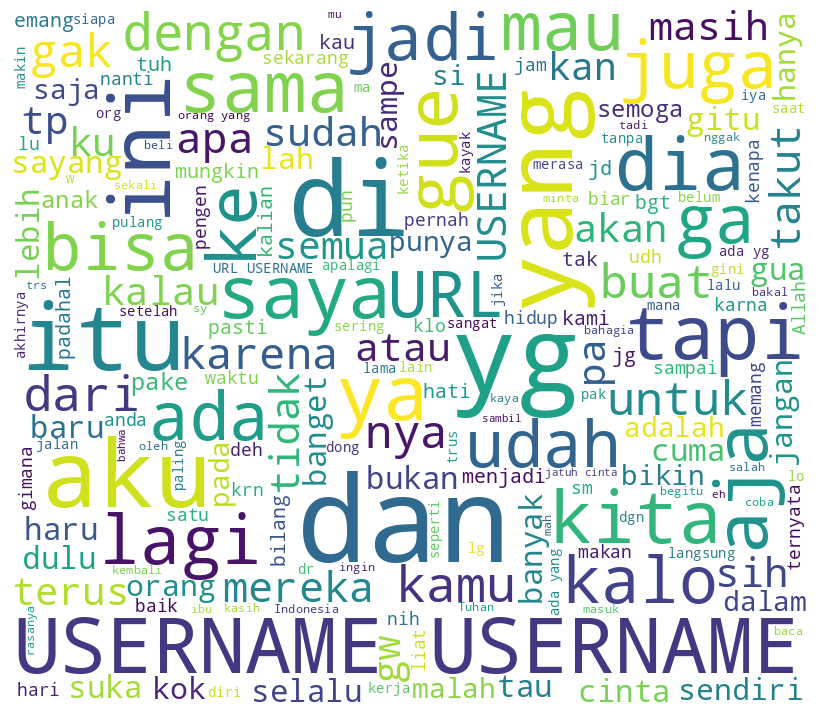

In [ ]:
stopwords=set(STOPWORDS)
wordclouds=WordCloud(width=800, 
                    height=700,
                    background_color='white',
                    max_font_size=120,
                    min_font_size=10,
                    stopwords=stopwords).generate(''.join(df['tweet']))

#plot the worldcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordclouds)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Preprocessing

### Case Folding

In [ ]:
def case_folding(data):
  temp_tweet = []

  for tweet in data:
    tweet = re.sub(r"(?:\@|https?\://)\S+", "", tweet)
    tweet = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('RT', '', tweet)
    tweet = re.sub('USERNAME', '', tweet)
    tweet = re.sub('URL', '', tweet)
    tweet = re.sub('SENSITIVE-NO', '', tweet)
    tweet = re.sub("[^a-zA-Z^']", " ", tweet)
    tweet = re.sub(" {2,}", " ", tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()
    tweet = tweet.lower();
    temp_tweet.append(tweet)
  return temp_tweet

In [ ]:
df['tweet']=case_folding(df['tweet'])
df.drop('temp', axis=1, inplace=True)
df.head()

,label,tweet
0,anger,soal jln jatibaru polisi tdk bs geak gubernur ...
1,anger,sesama cewe lho kayaknya harusnya bisa lebih r...
2,happy,kepingin gudeg mbarek bu hj amad foto dari goo...
3,anger,jln jatibaru bagian dari wilayah tn abang peng...
4,happy,sharing pengalaman aja kemarin jam batalin tik...


### Tokenize

In [ ]:
import nltk
nltk.download('punkt')

def tokenized(data):
  return data.apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['tweet']=tokenized(df['tweet'])
df.head()

,label,tweet
0,anger,"[soal, jln, jatibaru, polisi, tdk, bs, geak, g..."
1,anger,"[sesama, cewe, lho, kayaknya, harusnya, bisa, ..."
2,happy,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,anger,"[jln, jatibaru, bagian, dari, wilayah, tn, aba..."
4,happy,"[sharing, pengalaman, aja, kemarin, jam, batal..."


### Stemming

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(tweet) for tweet in data]

In [ ]:
df['tweet'] = df['tweet'].apply(stemming)
df.head()

,label,tweet
0,anger,"[soal, jln, jatibaru, polisi, tdk, bs, geak, g..."
1,anger,"[sama, cewe, lho, kayak, harus, bisa, lebih, r..."
2,happy,"[kepingin, gudeg, mbarek, bu, hj, amad, foto, ..."
3,anger,"[jln, jatibaru, bagi, dari, wilayah, tn, abang..."
4,happy,"[sharing, alam, aja, kemarin, jam, batalin, ti..."


### Slang Word

In [ ]:
import requests

slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [ ]:
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [ ]:
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [ ]:
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [ ]:
def removeSlang(data):
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [ ]:
df['tweet'] = df['tweet'].apply(removeSlang)
df.head()

,label,tweet
0,anger,"[soal, jalan, jatibaru, polisi, tidak, bisa, g..."
1,anger,"[sama, cewek, lho, kayak, harus, bisa, lebih, ..."
2,happy,"[mau, gudeg, mbarek, bu, hj, amad, foto, dari,..."
3,anger,"[jalan, jatibaru, bagi, dari, wilayah, tn, aba..."
4,happy,"[sharing, alam, saja, kemarin, jam, batalin, t..."


### Stop Words Removal

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['tweet']=removeStopWords(df['tweet'])
df.head()     

,label,tweet
0,anger,"[jalan, jatibaru, polisi, geak, gubernur, eman..."
1,anger,"[cewek, lho, kayak, rasain, sibuk, jaga, rasai..."
2,happy,"[gudeg, mbarek, bu, hj, amad, foto, google, se..."
3,anger,"[jalan, jatibaru, wilayah, tn, abang, atur, wi..."
4,happy,"[sharing, alam, kemarin, jam, batalin, tiket, ..."


Kombinasi menjadi data dalam satu string

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))
df.head()

,label,tweet
0,anger,jalan jatibaru polisi geak gubernur emangny po...
1,anger,cewek lho kayak rasain sibuk jaga rasain sakit...
2,happy,gudeg mbarek bu hj amad foto google sengaja bi...
3,anger,jalan jatibaru wilayah tn abang atur wilayah t...
4,happy,sharing alam kemarin jam batalin tiket stasiun...


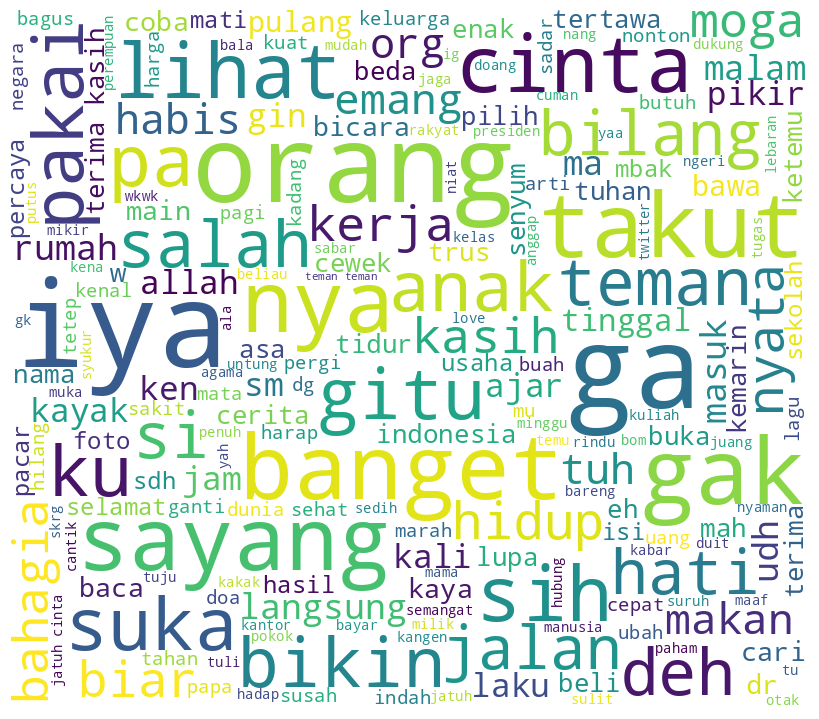

In [ ]:
stopwords=set(STOPWORDS)
wordclouds=WordCloud(width=800, 
                    height=700,
                    background_color='white',
                    max_font_size=120,
                    min_font_size=10,
                    stopwords=stopwords).generate(''.join(df['tweet']))

#plot the worldcloud image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordclouds)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Feature Extraction

In [ ]:
X = df['tweet']
y = df['label'].values

In [ ]:
count_vect = CountVectorizer()
X_count = count_vect.fit_transform(X)

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_count)

In [ ]:
from imblearn.over_sampling import SMOTE

sampler = SMOTE()
tfidf_vector, label = sampler.fit_resample(X_tfidf, y)
print(X_tfidf.shape)
print(y.shape)

(4401, 13152)
(4401,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=0)

## Membuat Model KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print('KNN Model using k=3 model accuracy = ' + str('{:4.2f}'.format(accuracy*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

KNN Model using k=3 model accuracy = 41.88%
------------------------------------------------
Confusion Matrix:
     0   1   2    3   4
0  130  21  15   49  16
1   38  45   7   21   6
2   43  24  55   56  14
3   11   5  10  101   6
4   53  26  28   63  38
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       anger       0.47      0.56      0.51       231
        fear       0.37      0.38      0.38       117
       happy       0.48      0.29      0.36       192
        love       0.35      0.76      0.48       133
     sadness       0.47      0.18      0.26       208

    accuracy                           0.42       881
   macro avg       0.43      0.44      0.40       881
weighted avg       0.44      0.42      0.40       881



In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print('KNN Model using k=5 model accuracy = ' + str('{:4.2f}'.format(accuracy*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

KNN Model using k=5 model accuracy = 44.04%
------------------------------------------------
Confusion Matrix:
     0   1   2   3   4
0  119  19  23  48  22
1   26  50  10  17  14
2   28  17  67  56  24
3    4   3  16  99  11
4   48  13  24  70  53
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       anger       0.53      0.52      0.52       231
        fear       0.49      0.43      0.46       117
       happy       0.48      0.35      0.40       192
        love       0.34      0.74      0.47       133
     sadness       0.43      0.25      0.32       208

    accuracy                           0.44       881
   macro avg       0.45      0.46      0.43       881
weighted avg       0.46      0.44      0.43       881



In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print('KNN Model using k=10 model accuracy = ' + str('{:4.2f}'.format(accuracy*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

KNN Model using k=10 model accuracy = 49.04%
------------------------------------------------
Confusion Matrix:
     0   1   2    3   4
0  143  20  25   24  19
1   25  51  12   16  13
2   24  12  77   47  32
3    5   0  10  105  13
4   43  19  37   53  56
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       anger       0.60      0.62      0.61       231
        fear       0.50      0.44      0.47       117
       happy       0.48      0.40      0.44       192
        love       0.43      0.79      0.56       133
     sadness       0.42      0.27      0.33       208

    accuracy                           0.49       881
   macro avg       0.48      0.50      0.48       881
weighted avg       0.49      0.49      0.48       881



In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print('KNN Model using k=15 model accuracy = ' + str('{:4.2f}'.format(accuracy*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

KNN Model using k=15 model accuracy = 49.38%
------------------------------------------------
Confusion Matrix:
     0   1   2    3   4
0  137  19  25   20  30
1   28  45  10   10  24
2   24  11  82   37  38
3    3   0  12  107  11
4   44  12  37   51  64
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       anger       0.58      0.59      0.59       231
        fear       0.52      0.38      0.44       117
       happy       0.49      0.43      0.46       192
        love       0.48      0.80      0.60       133
     sadness       0.38      0.31      0.34       208

    accuracy                           0.49       881
   macro avg       0.49      0.50      0.49       881
weighted avg       0.49      0.49      0.48       881



In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print('KNN Model using k=20 model accuracy = ' + str('{:4.2f}'.format(accuracy*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

KNN Model using k=20 model accuracy = 53.35%
------------------------------------------------
Confusion Matrix:
     0   1   2    3   4
0  153  11  21   18  28
1   22  49  11   12  23
2   33  12  87   26  34
3    4   0  11  106  12
4   41  12  33   47  75
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       anger       0.60      0.66      0.63       231
        fear       0.58      0.42      0.49       117
       happy       0.53      0.45      0.49       192
        love       0.51      0.80      0.62       133
     sadness       0.44      0.36      0.39       208

    accuracy                           0.53       881
   macro avg       0.53      0.54      0.52       881
weighted avg       0.53      0.53      0.52       881



In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)

print('KNN Model using k=25 model accuracy = ' + str('{:4.2f}'.format(accuracy*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, y_pred))

KNN Model using k=25 model accuracy = 53.46%
------------------------------------------------
Confusion Matrix:
     0   1   2    3   4
0  147   9  27   19  29
1   20  53  14    8  22
2   29  14  86   28  35
3    4   0  11  106  12
4   45  13  26   45  79
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       anger       0.60      0.64      0.62       231
        fear       0.60      0.45      0.51       117
       happy       0.52      0.45      0.48       192
        love       0.51      0.80      0.63       133
     sadness       0.45      0.38      0.41       208

    accuracy                           0.53       881
   macro avg       0.54      0.54      0.53       881
weighted avg       0.53      0.53      0.53       881



In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.model_selection import cross_val_predict

predNB = cross_val_predict(estimator = clf, X = X_tfidf, y = y, cv = 10)
conf_matNB = confusion_matrix(y, predNB)

In [ ]:
print(classification_report(y, predNB))

              precision    recall  f1-score   support

       anger       0.55      0.82      0.66      1101
        fear       0.95      0.28      0.43       649
       happy       0.61      0.61      0.61      1017
        love       0.89      0.42      0.57       637
     sadness       0.45      0.57      0.50       997

    accuracy                           0.58      4401
   macro avg       0.69      0.54      0.56      4401
weighted avg       0.65      0.58      0.57      4401

